# Working with Time Series

In [309]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

## Manipulating with python standard library

In [247]:
# Build the datetime for 6/26/2018
datetime(2018, 6, 26)

datetime.datetime(2018, 6, 26, 0, 0)

In [248]:
# Save current date into the variable "date", as a datetime object, created from the string 'June 26, 2018'
date = parser.parse('June 26, 2018')

In [249]:
# Get the day of the week of 'date'
date.strftime('%A')

'Tuesday'

## Manipulating with np

In [250]:
# Make 'date' a numpy object
date = np.array('2018-06-26', dtype=np.datetime64)

In [251]:
# Make an array with the 12 days after 'date'
date + np.arange(12)

array(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
       '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
       '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07'], dtype='datetime64[D]')

In [252]:
# Make 'date' the current time down to the minute as a np array
date = np.datetime64('2018-06-26 01:32', 'm')

## Manipulating with pandas

In [103]:
# Convert a string to a datetime with pandas
date = pd.to_datetime('2018-06-26 1:39pm')  # Able to use 'am' and 'pm' in the string
date

Timestamp('2018-06-26 13:39:00')

In [259]:
# Make a timedelta object with 12 days
delta = pd.to_timedelta(np.arange(12), unit='D')
delta

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

In [260]:
# Get the 12 days after 'date'
date + delta

DatetimeIndex(['2018-06-26 01:32:00', '2018-06-27 01:32:00',
               '2018-06-28 01:32:00', '2018-06-29 01:32:00',
               '2018-06-30 01:32:00', '2018-07-01 01:32:00',
               '2018-07-02 01:32:00', '2018-07-03 01:32:00',
               '2018-07-04 01:32:00', '2018-07-05 01:32:00',
               '2018-07-06 01:32:00', '2018-07-07 01:32:00'],
              dtype='datetime64[ns]', freq=None)

In [275]:
# Another way to do it
pd.date_range('2018-06-26', periods=12, freq='D')

DatetimeIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
               '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07'],
              dtype='datetime64[ns]', freq='D')

In [276]:
pd.period_range('2018-06-26', periods=12, freq='D')

PeriodIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
             '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
             '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07'],
            dtype='period[D]', freq='D')

In [282]:
pd.timedelta_range(start=0, periods=12, freq='D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq='D')

## Indexing data by timestamps in pandas

In [266]:
dt_index = pd.to_datetime('2018-06-26') + pd.to_timedelta(np.arange(12), unit='D')

In [268]:
# Stick the datetime index into a series
srs = pd.Series(np.arange(12), index=dt_index)
srs

2018-06-26     0
2018-06-27     1
2018-06-28     2
2018-06-29     3
2018-06-30     4
2018-07-01     5
2018-07-02     6
2018-07-03     7
2018-07-04     8
2018-07-05     9
2018-07-06    10
2018-07-07    11
dtype: int32

In [269]:
# Get data from the 26th to the 30th
srs['2018-06-26' : '2018-06-30']

2018-06-26    0
2018-06-27    1
2018-06-28    2
2018-06-29    3
2018-06-30    4
dtype: int32

## Time Series Data Structures in Pandas

In [270]:
# For timestamps: pd.TimeStamp
pd.Timestamp

pandas._libs.tslib.Timestamp

In [271]:
# For time periods: pd.Period
pd.Period

pandas._libs.period.Period

In [272]:
# For time durations: pd.TimeDelta
pd.Timedelta

pandas._libs.tslib.Timedelta

In [178]:
# Make 'dates', a DateTime index, which is created by passing a list of a bunch of different kinds of strings 
# that could conceivably be seen as dates

dates = pd.to_datetime(['06-26-2018', '6/27/2018', '6-28-18', '6.29.2018', '20180630', 'July 1st, 2018'])

dates  # That's an impressive as hell parser

DatetimeIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-06-30', '2018-07-01'],
              dtype='datetime64[ns]', freq=None)

In [283]:
# Send dates to a period index, separated by day
pd.PeriodIndex(dates, freq='D')

PeriodIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
             '2018-06-30', '2018-07-01'],
            dtype='period[D]', freq='D')

In [285]:
# Get TimeDelta that has the difference between every date and june 26th, 2017
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Ranges

In [200]:
# Get date range from june 26th, 2018 to july 26th, 2018 (e.g. multiple points in time)


DatetimeIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
               '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
               '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07',
               '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15',
               '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19',
               '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26'],
              dtype='datetime64[ns]', freq='D')

In [201]:
# Get a 31-day timedelta range


TimedeltaIndex([ '1 days',  '2 days',  '3 days',  '4 days',  '5 days',
                 '6 days',  '7 days',  '8 days',  '9 days', '10 days',
                '11 days', '12 days', '13 days', '14 days', '15 days',
                '16 days', '17 days', '18 days', '19 days', '20 days',
                '21 days', '22 days', '23 days', '24 days', '25 days',
                '26 days', '27 days', '28 days', '29 days', '30 days',
                '31 days'],
               dtype='timedelta64[ns]', freq='D')

In [203]:
# Get a 31-day period (e.g. can be used to check if a time is in this timeframe)


PeriodIndex(['2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29',
             '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03',
             '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07',
             '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
             '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15',
             '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19',
             '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23',
             '2018-07-24', '2018-07-25', '2018-07-26'],
            dtype='period[D]', freq='D')

In [219]:
# Check if august 1st is in the above period range (Can just use a string - cool!!)


True

In [223]:
# Get a timedelta range of in increments of an hour 30 minutes


TimedeltaIndex(['00:00:00', '01:30:00'], dtype='timedelta64[ns]', freq='90T')

### Resampling, Shifting, Windowing

In [232]:
from pandas_datareader import data

In [286]:
# goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')

In [ ]:
# goog.head()

In [ ]:
# goog = only the 'close' column

In [287]:
# plot 'close' as a line graph across dates

In [ ]:
# resample() is a data aggregation (e.g. could report average of a year)
# asfreq() is a data selection (e.g. could report value at end of a year)

In [289]:
# Plot average data resampled by business year, style=':'
# On top of that, plot data by frequency of business year, style='--'

In [ ]:
# Resample business day data at a daily frequency, then plot data from September, 2004

In [ ]:
# Plot data from 900 days after september, 2004 by shifting the data and index forward

In [ ]:
# Use tshift to calculate the % return on investment for google stock over 900 days
# Also, figure out how you'd calculate this math...

### Rolling windows

In [ ]:
# Calculate rolling mean and standard deviation of Google stock prices, then plot

## Visualizing Seattle bike counts

In [294]:
data = pd.read_csv('data/Fremont.csv', index_col = 'Date', parse_dates=True)

In [295]:
data.tail()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2018-05-31 19:00:00,84.0,164.0
2018-05-31 20:00:00,27.0,93.0
2018-05-31 21:00:00,36.0,63.0
2018-05-31 22:00:00,21.0,30.0
2018-05-31 23:00:00,14.0,16.0


In [296]:
data.columns = ['West', 'East']

In [298]:
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [301]:
data.dropna().describe()

,West,East
count,49600.000000,49600.000000
mean,54.716230,55.895887
std,73.001037,81.137001
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,28.000000
75%,72.000000,68.000000
max,854.000000,717.000000


In [303]:
data['Total'] = data.eval('West + East')

In [305]:
data['Mean'] = data.eval('(West + East) / 2')

In [306]:
data.head()

,West,East,Total,Mean
Date,,,,
2012-10-03 00:00:00,4.0,9.0,13.0,6.5
2012-10-03 01:00:00,4.0,6.0,10.0,5.0
2012-10-03 02:00:00,1.0,1.0,2.0,1.0
2012-10-03 03:00:00,2.0,3.0,5.0,2.5
2012-10-03 04:00:00,6.0,1.0,7.0,3.5


In [307]:
data.dropna().describe()

,West,East,Total,Mean
count,49600.000000,49600.000000,49600.000000,49600.000000
mean,54.716230,55.895887,110.612117,55.306058
std,73.001037,81.137001,140.092804,70.046402
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000,7.500000
50%,29.000000,28.000000,60.000000,30.000000
75%,72.000000,68.000000,144.000000,72.000000
max,854.000000,717.000000,1165.000000,582.500000


Text(0,0.5,'Hourly Bicycle Count')

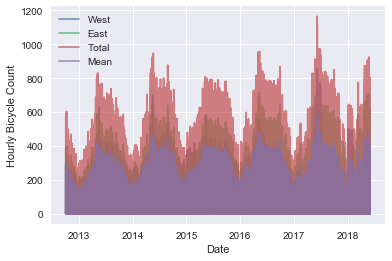

In [311]:
# Plot hourly bicycle count by year
data.plot(alpha=.7)
plt.ylabel('Hourly Bicycle Count')

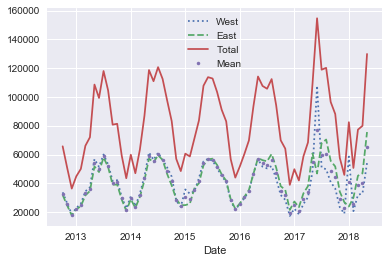

In [316]:
# Plot summed weekly bicycle count
weekly = data.resample('M').sum()
weekly.plot(style=[':', '--', '-', '.'])

In [319]:
data.head(0)

,West,East,Total,Mean
Date,,,,


Text(0,0.5,'mean hourly count')

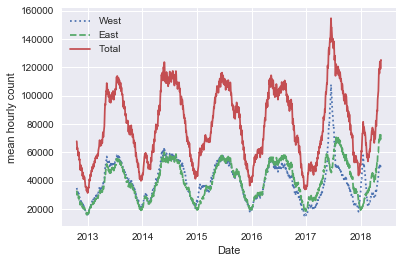

In [327]:
# Plot centered 30-day rolling mean
daily = data.resample('D').sum()
daily[['West', 'East', 'Total']].rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')